<a href="https://colab.research.google.com/github/Nonaacie/KBL/blob/main/Penyakit%20Jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Berikut adalah variabel dalam dataset heart :
*   age (umur dalam tahun)
*   sex (1 = laki-laki, 0 = perempuan)
*   cp (nyeri dada dengan nilai 0(tidak ada), 1(ringan), 2(signifikan), dan 3(heabt))
*   trestbps (tekanan darah)
*   chol (konsentrasi kolesterol dalam mg/dl)
*   fbs (konsentrasi gula setelah puasa dalam 8 jam dengan nilai 1(> 120 mg/dl) dan 0(< 120 mg/dL))
*   restecg (hasil ECG dengan nilai 0(tidak ada kelainan), 1(kelainan minor), 2(kelainan signifikan))
*   thalach (detak jantung maksimal setelah latihan fisik intens)
*   exang ( ada tidaknya rasa sakit atau tekanan pada dada akibat kurangnya pasokan darah dan oksigen
yang cukup ke jantung)
*   oldpeak (penurunan segmen ST pada elektrokardiogram (EKG) setelah latihan fisik)
*   slope (Tingkat penurunan ST segment dengan nilai 0(tidak ada), 1(lambat), 2(cepat))
*   ca (jumlah sumbatan arteri koroner utama dengan nilai 0(tidak ada), 1(1 arteri), 2(2 arteri), 3(3 arteri))
*   thal (aliran darah ke otot jantung dengan nilai 0 = normal, 1 = fixed defect, 2 = reversible defect)
*   target (mengidap penyakit jantung atau tidak)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
# from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Metopen/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [ ]:
df.shape

(303, 14)

**EDA**

<ipython-input-68-00d0c87e9a13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="bwr")


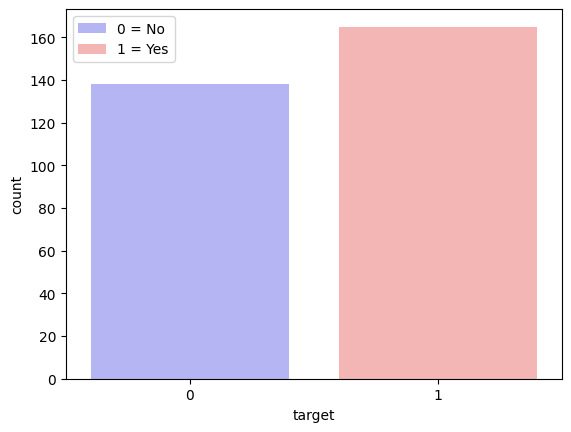

In [ ]:
df.target.value_counts()
sns.countplot(x="target", data=df, palette="bwr")
plt.legend(["0 = No ", "1 = Yes"])
plt.show()

In [ ]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Presentase pasien tidak memiliki penyakit jantung: {: .2f}%".format((countNoDisease / (len(df.target))*100)))
print("Presentase pasien memiliki penyakit jantung: {: .2f}%".format((countHaveDisease / (len(df.target))*100)))

Presentase pasien tidak memiliki penyakit jantung:  45.54%
Presentase pasien memiliki penyakit jantung:  54.46%


In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Presentase pasien perempuan: {: .2f}%".format((countFemale / (len(df.sex))*100)))
print("Presentase pasien laki-laki: {: .2f}%".format((countMale / (len(df.sex))*100)))

Presentase pasien perempuan:  31.68%
Presentase pasien laki-laki:  68.32%


In [ ]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Presentase pasien perempuan: {: .2f}%".format((countFemale / (len(df.sex))*100)))
print("Presentase pasien laki-laki: {: .2f}%".format((countMale / (len(df.sex))*100)))

Presentase pasien perempuan:  31.68%
Presentase pasien laki-laki:  68.32%


Mengambil Mean

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


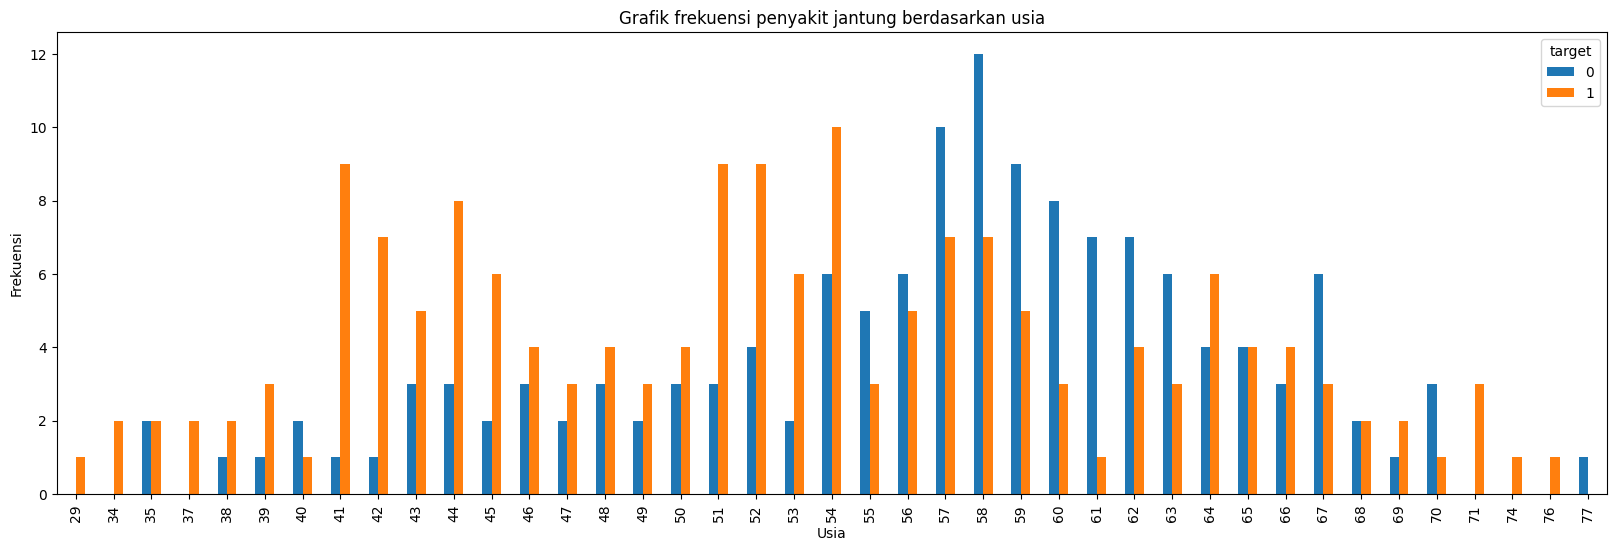

In [ ]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20,6))
plt.title('Grafik frekuensi penyakit jantung berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('PenyakitJantungDanUmur.png')
plt.show()

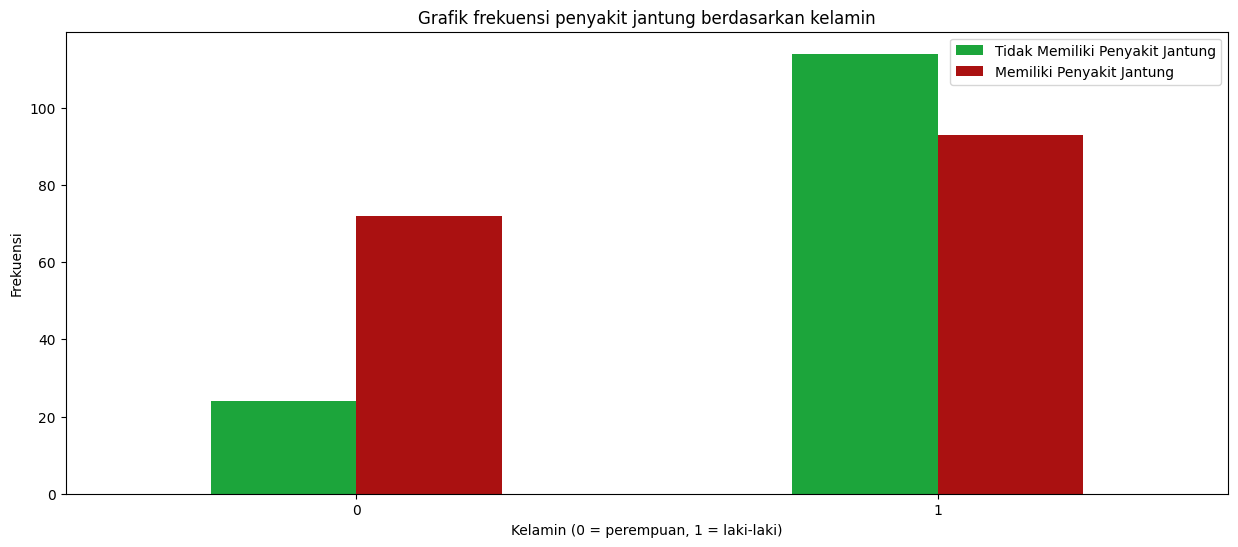

In [ ]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(15,6), color=['#1CA53B', '#AA1111' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan kelamin')
plt.xlabel('Kelamin (0 = perempuan, 1 = laki-laki)')
plt.xticks(rotation=0)
plt.legend(["Tidak Memiliki Penyakit Jantung", "Memiliki Penyakit Jantung"])
plt.ylabel('Frekuensi')
plt.show()

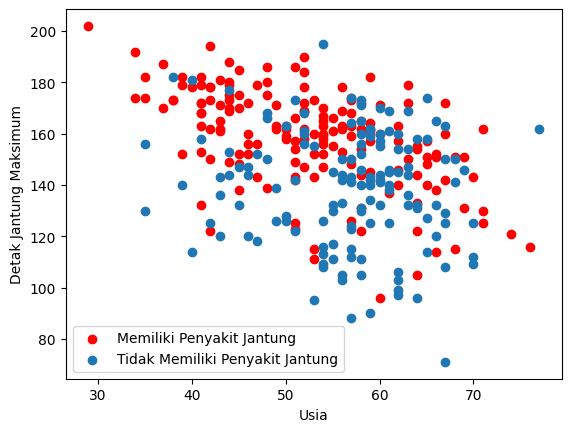

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Memiliki Penyakit Jantung", "Tidak Memiliki Penyakit Jantung"])
plt.xlabel("Usia")
plt.ylabel("Detak Jantung Maksimum")
plt.show()

Note : Thalach (detak jantung maksimum yang dicapai)

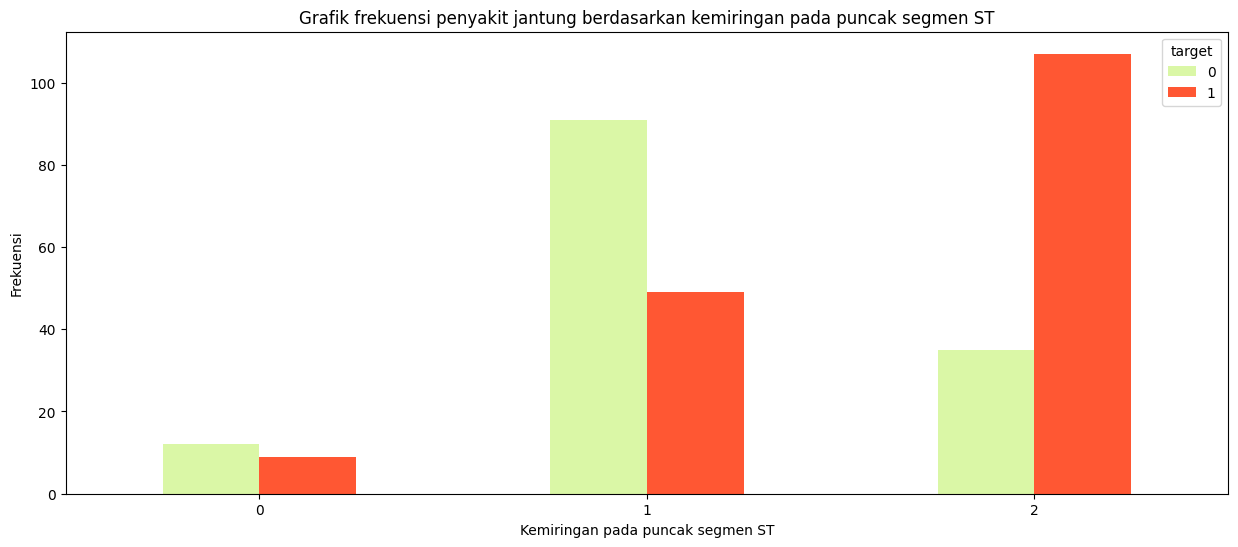

In [ ]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15,6), color=['#DAF7A6', '#FF5733' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan kemiringan pada puncak segmen ST')
plt.xlabel('Kemiringan pada puncak segmen ST')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-77-5fd9bc1d2fa6>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Tidak memiliki Penyakit Jantung", "Memiliki Penyakit Jantung")


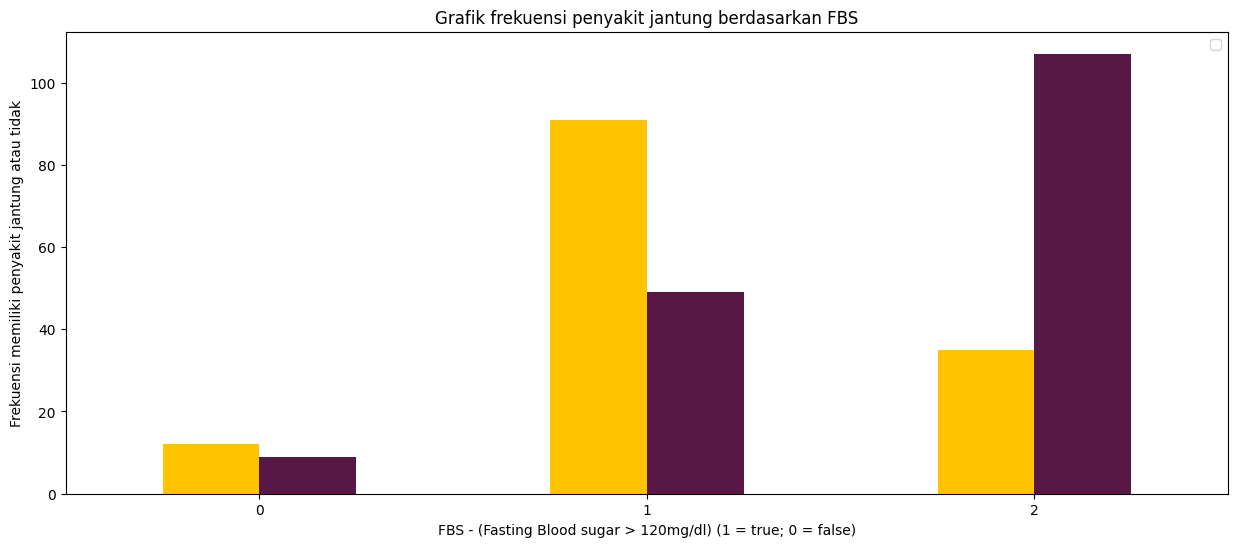

In [ ]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15,6), color=['#FFC300', '#581845' ])
plt.title('Grafik frekuensi penyakit jantung berdasarkan FBS')
plt.xlabel('FBS - (Fasting Blood sugar > 120mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend("Tidak memiliki Penyakit Jantung", "Memiliki Penyakit Jantung")
plt.ylabel('Frekuensi memiliki penyakit jantung atau tidak')
plt.show()

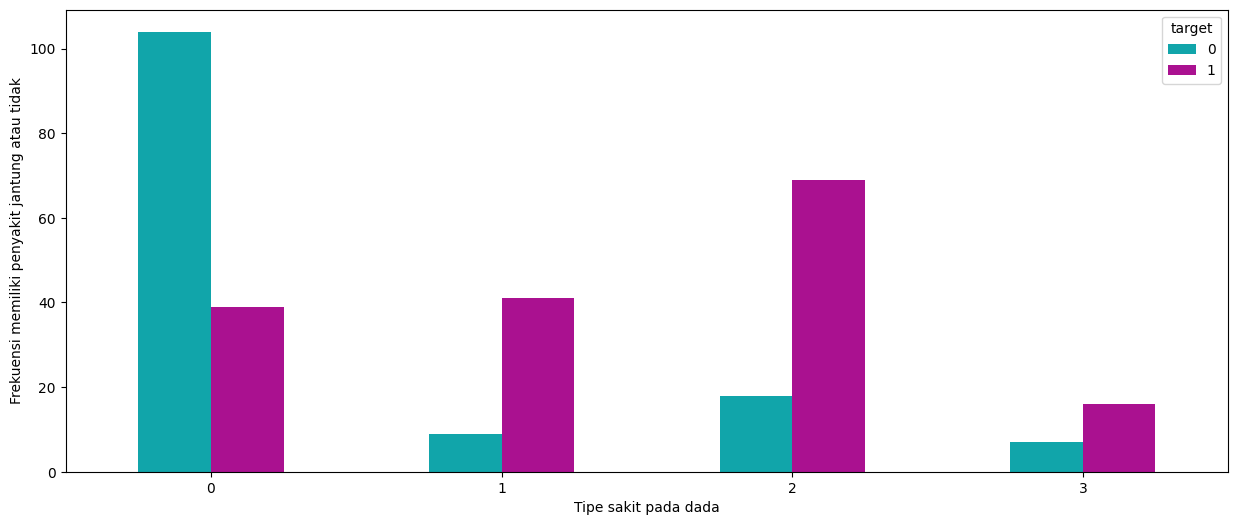

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(15,6), color=['#11A5AA', '#AA1190' ])
plt.xlabel('Tipe sakit pada dada')
plt.xticks(rotation = 0)
plt.ylabel('Frekuensi memiliki penyakit jantung atau tidak')
plt.show()

Note : cp (tipe sakit pada dada)

**Preprocesing**

Scaling

In [ ]:
scaler = MinMaxScaler()

normalized_array = scaler.fit_transform(df[['sex', 'chol', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']])
normalized_df = pd.DataFrame(normalized_array, columns=['sex', 'chol', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

df[['sex', 'chol', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']] = normalized_df

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,0.244292,1.0,0.0,150,0.0,2.3,0.0,0.0,0.333333,1
1,37,1.0,2,130,0.283105,0.0,0.5,187,0.0,3.5,0.0,0.0,0.666667,1
2,41,0.0,1,130,0.178082,0.0,0.0,172,0.0,1.4,1.0,0.0,0.666667,1
3,56,1.0,1,120,0.251142,0.0,0.5,178,0.0,0.8,1.0,0.0,0.666667,1
4,57,0.0,0,120,0.520548,0.0,0.5,163,1.0,0.6,1.0,0.0,0.666667,1


Heatmap

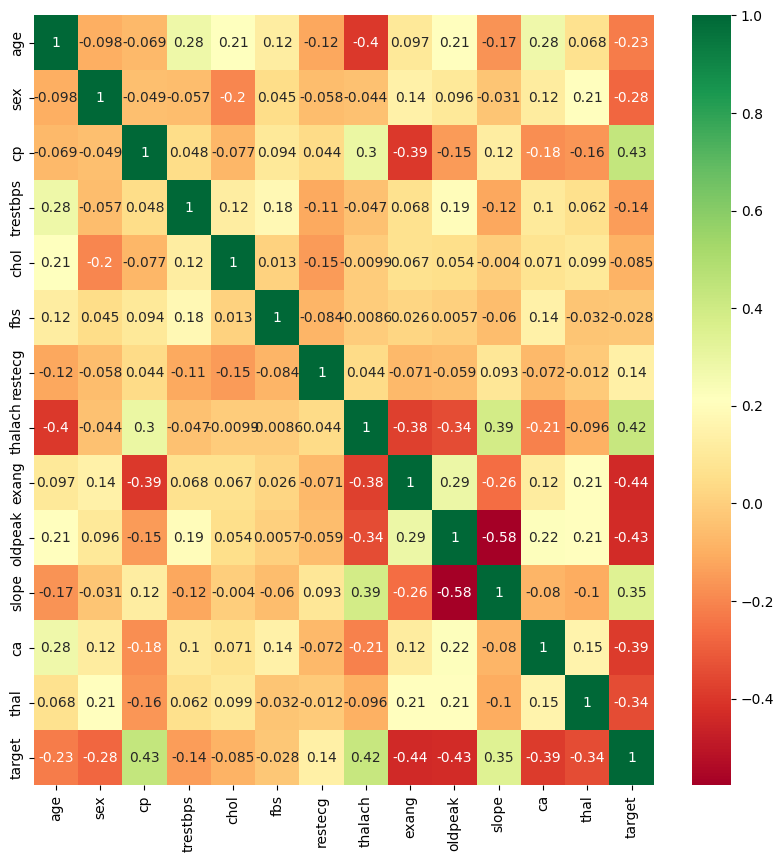

In [ ]:
correlations = df.corr()
plt.figure(figsize=(10, 10))

heatmap_heart = sns.heatmap(df[correlations.index].corr(), annot=True, cmap='RdYlGn')
plt.show()

Note : warna hijau dan merah negatif

In [ ]:
# Assuming 'heart_disease' is a Bunch object with a 'data' attribute containing the actual data
train, test = train_test_split(df, test_size=0.2, random_state=100)

print("Training Dataset Count: " + str(len(train)))
print("Test Dataset Count: " + str(len(test)))

Training Dataset Count: 242
Test Dataset Count: 61


**Modeling**

In [ ]:
X = df.drop(['target'], axis = 1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [ ]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[21,  6],
       [ 7, 27]])

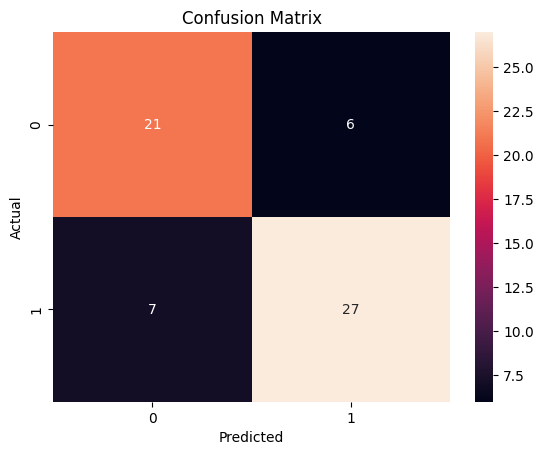

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.7868852459016393
Precision:  0.8181818181818182
Recall/Sensitivity:  0.7941176470588235


**Modeling 2**

In [ ]:
for i in range(30):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Accuracy: 0.8360655737704918
Precision: 0.8928571428571429
Recall: 0.78125
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy: 0.8360655737704918
Precision: 0.8928571428571429
Recall: 0.78125
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Accuracy: 0.8360655737704918
Precision: 0.9230769230769231
Recall: 0.75
Classification Report:
              precision    recall  f1-score   support



**Tunning**

Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fold 1: Akurasi = 0.7347, Presisi = 0.7200, Recall = 0.7500
Fold 2: Akurasi = 0.7347, Presisi = 0.8400, Recall = 0.7000
Fold 3: Akurasi = 0.5833, Presisi = 0.5417, Recall = 0.5909
Fold 4: Akurasi = 0.8125, Presisi = 0.8621, Recall = 0.8333
Fold 5: Akurasi = 0.7500, Presisi = 0.8571, Recall = 0.6667
Rata-rata dari akurasi, presisi, dan recall setelah KFold cross-validation: 0.7318


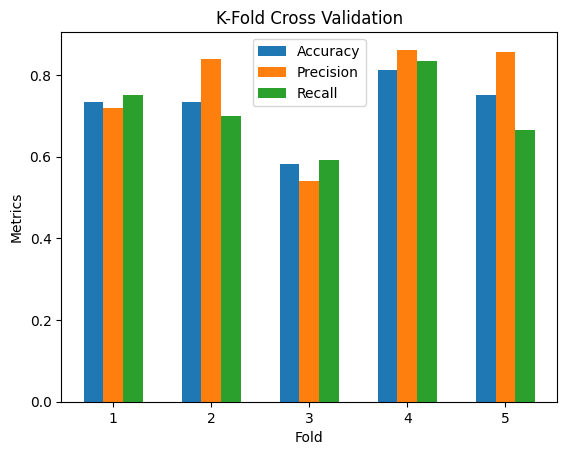

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier


# Assuming X and y are defined and preprocessed earlier in the code

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create DecisionTreeClassifier object
tree_clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Parameter terbaik dari GridSearchCV:", best_params)

# Create DecisionTreeClassifier with best parameters
best_clf = DecisionTreeClassifier(**best_params)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []

# Convert X_train and y_train to numpy arrays if they are not already
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# KFold Cross Validation
fold = 1
for train_index, val_index in kf.split(X_train_np):
    X_train_kf, X_val_kf = X_train_np[train_index], X_train_np[val_index]
    y_train_kf, y_val_kf = y_train_np[train_index], y_train_np[val_index]

    # Train the classifier
    best_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = best_clf.predict(X_val_kf)

    # Calculate metrics
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    precision_kf = precision_score(y_val_kf, y_pred_kf)
    recall_kf = recall_score(y_val_kf, y_pred_kf)

    accuracies.append(accuracy_kf)
    precisions.append(precision_kf)
    recalls.append(recall_kf)

    print(f"Fold {fold}: Akurasi = {accuracy_kf:.4f}, Presisi = {precision_kf:.4f}, Recall = {recall_kf:.4f}")
    fold += 1

# Calculate mean metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)

# Calculate the accumulated average of the three metrics
accumulated_average = np.mean([mean_accuracy, mean_precision, mean_recall])
print("Rata-rata dari akurasi, presisi, dan recall setelah KFold cross-validation: {:.4f}".format(accumulated_average))

# Final evaluation on the test set
best_clf.fit(X_train, y_train)
y_pred_test = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)

# Plotting the metrics as bar charts
folds = range(1, kf.get_n_splits() + 1)
width = 0.2  # Width of the bars

plt.bar([f - width for f in folds], accuracies, width, label='Accuracy')
plt.bar(folds, precisions, width, label='Precision')
plt.bar([f + width for f in folds], recalls, width, label='Recall')

plt.xlabel('Fold')
plt.ylabel('Metrics')
plt.title('K-Fold Cross Validation')
plt.xticks(folds)  # Set x-axis ticks to be the fold numbers
plt.legend()
plt.show()

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[26,  3],
       [10, 22]])

Fold 1 - Parameter terbaik dari GridSearchCV: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fold 1 - Akurasi = 92.31%, Presisi = 92.98%, Recall = 94.64%
Fold 2 - Parameter terbaik dari GridSearchCV: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 2 - Akurasi = 89.01%, Presisi = 93.33%, Recall = 90.32%
Fold 3 - Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 3 - Akurasi = 94.51%, Presisi = 94.92%, Recall = 96.55%
Fold 4 - Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Fold 4 - Akurasi = 95.60%, Presisi = 96.00%, Recall = 96.00%
Fold 5 - Parameter terbaik dari GridSearchCV: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Fold 5 - Akurasi = 90.11%, Presisi = 90.48%, Recall = 95.00%
Rata-rata akurasi setelah KFold

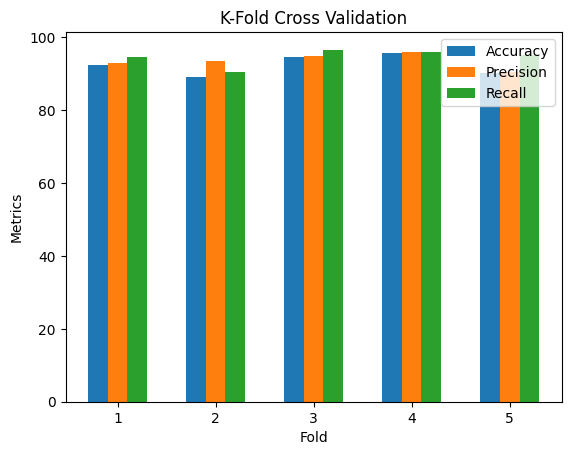

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fine-tuned parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []

# Convert X_train and y_train to numpy arrays if they are not already
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_train_np):
    X_train_kf, X_val_kf = X_train_np[train_index], X_train_np[val_index]
    y_train_kf, y_val_kf = y_train_np[train_index], y_train_np[val_index]

    # Create DecisionTreeClassifier object
    tree_clf = DecisionTreeClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=3, scoring='accuracy')

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Parameter terbaik dari GridSearchCV: {best_params}")

    # Create DecisionTreeClassifier with best parameters
    best_clf = DecisionTreeClassifier(**best_params)

    # Train the classifier on the current fold's training data
    best_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = best_clf.predict(X_val_kf)

    # Calculate metrics
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    precision_kf = precision_score(y_val_kf, y_pred_kf)
    recall_kf = recall_score(y_val_kf, y_pred_kf)

    accuracies.append(accuracy_kf * 100)
    precisions.append(precision_kf * 100)
    recalls.append(recall_kf * 100)

    print(f"Fold {fold} - Akurasi = {accuracy_kf * 100:.2f}%, Presisi = {precision_kf * 100:.2f}%, Recall = {recall_kf * 100:.2f}%")
    fold += 1

# Calculate mean metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
print("Rata-rata akurasi setelah KFold cross-validation: {:.2f}%".format(mean_accuracy))
print("Rata-rata presisi setelah KFold cross-validation: {:.2f}%".format(mean_precision))
print("Rata-rata recall setelah KFold cross-validation: {:.2f}%".format(mean_recall))

# Final evaluation on the test set
best_clf.fit(X_train, y_train)
y_pred_test = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
print("Akurasi pada test set: {:.2f}%".format(test_accuracy))


# Plotting the metrics as bar charts
folds = range(1, kf.get_n_splits() + 1)
width = 0.2  # Width of the bars

plt.bar([f - width for f in folds], accuracies, width, label='Accuracy')
plt.bar(folds, precisions, width, label='Precision')
plt.bar([f + width for f in folds], recalls, width, label='Recall')

plt.xlabel('Fold')
plt.ylabel('Metrics')
plt.title('K-Fold Cross Validation')
plt.xticks(folds)  # Set x-axis ticks to be the fold numbers
plt.legend()
plt.show()

# Menampilkan plot
plt.tight_layout()
plt.show()

#  kode baru


Fold 1 - Parameter terbaik dari GridSearchCV: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Fold 1 - Akurasi = 94.51%, Presisi = 94.74%, Recall = 96.43%
Fold 2 - Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Fold 2 - Akurasi = 90.11%, Presisi = 94.92%, Recall = 90.32%
Fold 3 - Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Fold 3 - Akurasi = 94.51%, Presisi = 94.92%, Recall = 96.55%
Fold 4 - Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 4 - Akurasi = 95.60%, Presisi = 96.00%, Recall = 96.00%
Fold 5 - Parameter terbaik dari GridSearchCV: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Fold 5 - Akurasi = 93.41%, Presisi = 93.55%, Recall = 96.67%
Rata-rata akurasi setelah KFo

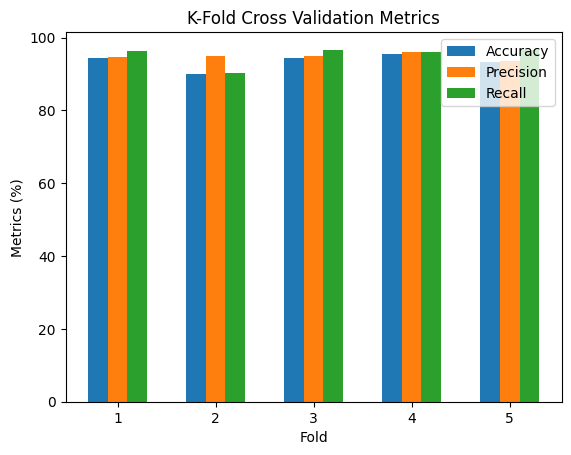

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, KFold

# Fine-tuned parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=21)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []

# Convert X_train and y_train to numpy arrays if they are not already
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_train_np):
    X_train_kf, X_val_kf = X_train_np[train_index], X_train_np[val_index]
    y_train_kf, y_val_kf = y_train_np[train_index], y_train_np[val_index]

    # Create DecisionTreeClassifier object
    tree_clf = DecisionTreeClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=3, scoring='accuracy')

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Parameter terbaik dari GridSearchCV: {best_params}")

    # Create DecisionTreeClassifier with best parameters
    best_clf = DecisionTreeClassifier(**best_params)

    # Train the classifier on the current fold's training data
    best_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = best_clf.predict(X_val_kf)

    # Calculate metrics
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    precision_kf = precision_score(y_val_kf, y_pred_kf)
    recall_kf = recall_score(y_val_kf, y_pred_kf)

    accuracies.append(accuracy_kf * 100)
    precisions.append(precision_kf * 100)
    recalls.append(recall_kf * 100)

    print(f"Fold {fold} - Akurasi = {accuracy_kf * 100:.2f}%, Presisi = {precision_kf * 100:.2f}%, Recall = {recall_kf * 100:.2f}%")
    fold += 1

# Calculate mean metrics over all folds
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
print("Rata-rata akurasi setelah KFold cross-validation: {:.2f}%".format(mean_accuracy))
print("Rata-rata presisi setelah KFold cross-validation: {:.2f}%".format(mean_precision))
print("Rata-rata recall setelah KFold cross-validation: {:.2f}%".format(mean_recall))

# Final evaluation on the test set using the best hyperparameters found
best_clf.fit(X_train_np, y_train_np)  # Fit using the entire training set
y_pred_test = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
test_precision = precision_score(y_test, y_pred_test) * 100
test_recall = recall_score(y_test, y_pred_test) * 100
print("Akurasi pada test set: {:.2f}%".format(test_accuracy))
print("Presisi pada test set: {:.2f}%".format(test_precision))
print("Recall pada test set: {:.2f}%".format(test_recall))

# Plotting the metrics as bar charts
folds = range(1, kf.get_n_splits() + 1)
width = 0.2  # Width of the bars

plt.bar([f - width for f in folds], accuracies, width, label='Accuracy')
plt.bar(folds, precisions, width, label='Precision')
plt.bar([f + width for f in folds], recalls, width, label='Recall')

plt.xlabel('Fold')
plt.ylabel('Metrics (%)')
plt.title('K-Fold Cross Validation Metrics')
plt.xticks(folds)  # Set x-axis ticks to be the fold numbers
plt.legend()
plt.show()

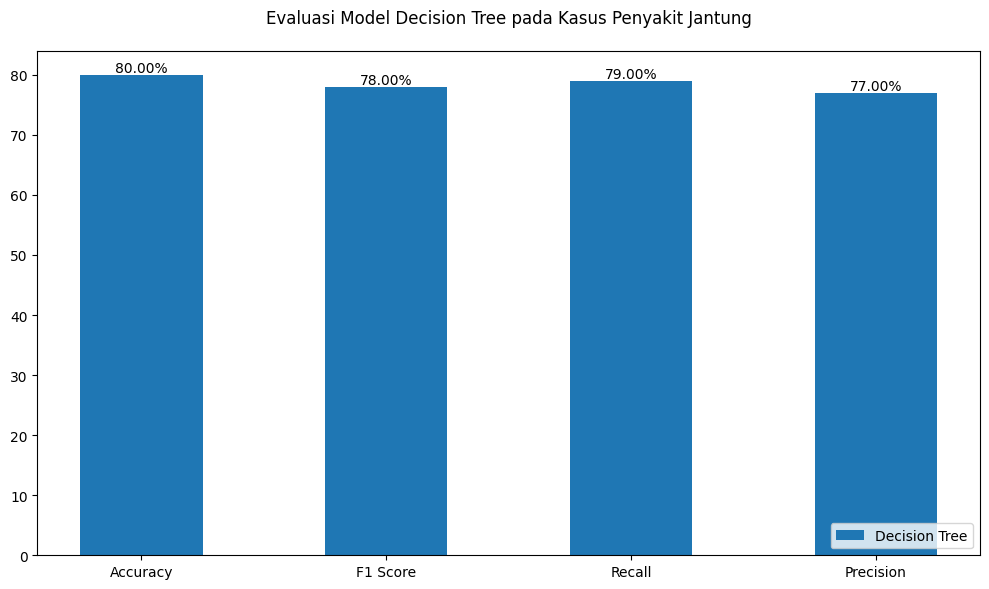

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contoh DataFrame dengan metrik evaluasi
data = {
    'Metric': ['Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Decision Tree': [0.80, 0.78, 0.79, 0.77]  # Nilai metrik untuk Decision Tree
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mengalikan nilai metrik dengan 100
df['Decision Tree'] = df['Decision Tree'] * 100

# Lebar bar
bar_width = 0.5

# Membuat subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Menentukan posisi bar
x = range(len(df['Metric']))

# Plotting untuk Decision Tree
dt_bar = ax.bar(x, df['Decision Tree'], bar_width, label='Decision Tree')

# Menentukan judul dan label sumbu x
ax.set_title('Evaluasi Model Decision Tree pada Kasus Penyakit Jantung', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df['Metric'])
ax.legend(loc='lower right')

# Menambahkan nilai di atas bar
def add_label(bars, values):
    for bar, val in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{val:.2f}%', ha='center', va='bottom')

add_label(dt_bar, df['Decision Tree'])

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
import numpy as np

# Assuming X and y are defined and preprocessed earlier in the code

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create DecisionTreeClassifier object
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Parameter terbaik dari GridSearchCV:", best_params)

# Create DecisionTreeClassifier with best parameters
best_clf = DecisionTreeClassifier(**best_params)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []

# KFold Cross Validation
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[val_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[val_index]

    best_clf.fit(X_train_kf, y_train_kf)
    y_pred_kf = best_clf.predict(X_val_kf)

    accuracies.append(accuracy_score(y_val_kf, y_pred_kf))
    precisions.append(precision_score(y_val_kf, y_pred_kf))
    recalls.append(recall_score(y_val_kf, y_pred_kf))

# Calculate and print mean metrics
print("Rata-rata akurasi setelah KFold cross-validation: {:.4f}".format(np.mean(accuracies)))
print("Rata-rata presisi setelah KFold cross-validation: {:.4f}".format(np.mean(precisions)))
print("Rata-rata recall setelah KFold cross-validation: {:.4f}".format(np.mean(recalls)))

# Final evaluation on the test set
best_clf.fit(X_train, y_train)
y_pred_test = best_clf.predict(X_test)

# Print test set metrics
print("Akurasi pada test set: {:.4f}".format(accuracy_score(y_test, y_pred_test)))
print("Presisi pada test set: {:.4f}".format(precision_score(y_test, y_pred_test)))
print("Recall pada test set: {:.4f}".format(recall_score(y_test, y_pred_test)))
print("Classification Report (Test Set):\n", classification_report(y_test, y_pred_test))

Parameter terbaik dari GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Rata-rata akurasi setelah KFold cross-validation: 0.7065
Rata-rata presisi setelah KFold cross-validation: 0.7639
Rata-rata recall setelah KFold cross-validation: 0.6817
Akurasi pada test set: 0.8197
Presisi pada test set: 0.8889
Recall pada test set: 0.7500
Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



**Predicting**

In [ ]:
smote = SMOTE(random_state = 45)

s_X_train, s_y_train = smote.fit_resample(X_train, y_train)
s_X_test, s_y_test = smote.fit_resample(X_test, y_test)

In [ ]:
s_dt = DecisionTreeClassifier()

s_dt.fit(s_X_train, s_y_train)

# Use s_dt to predict, not dt
s_y_pred = s_dt.predict(s_X_test)

In [ ]:
# Perform SMOTE only on the training set
smote = SMOTE(random_state = 45)
s_X_train, s_y_train = smote.fit_resample(X_train, y_train)

# Train the model on the resampled training set
s_dt = DecisionTreeClassifier()
s_dt.fit(s_X_train, s_y_train)

# Predict on the original test set (not oversampled)
s_y_pred = s_dt.predict(X_test) # Use X_test, not s_X_test

# Calculate the confusion matrix
s_cnf_matrix = metrics.confusion_matrix(y_test, s_y_pred) # Use y_test, not s_y_test

s_cnf_matrix

array([[23,  6],
       [ 5, 27]])

Note :
Data akan berubah setiap run


*   32 pasien diprediksi bahwa mereka akan memiliki penyakit jantung, prediksinya benar (True-Positive)
*   30 pasien diprediksi bahwa mereka tidak akan memiliki penyakit jantung, prediksinya benar (True-Negatif)
*   2 pasien diprediksi bahwa mereka akan memiliki penyakit jantung, namun prediksinya salah (False-Positive)
*   0 pasien diprediksi bahwa mereka tidak akan memiliki penyakit jantung, namun prediksinya salah (False-Negative)

In [ ]:
# Perform SMOTE only on the training set
smote = SMOTE(random_state = 45)
s_X_train, s_y_train = smote.fit_resample(X_train, y_train)

# Train the model on the resampled training set
s_dt = DecisionTreeClassifier()
s_dt.fit(s_X_train, s_y_train)

# Predict on the original test set (not oversampled)
s_y_pred = s_dt.predict(X_test) # Use X_test, not s_X_test

# Calculate metrics using the original test set labels (y_test)
print("Accuracy: ", metrics.accuracy_score(y_test, s_y_pred))
print("Precision: ", metrics.precision_score(y_test, s_y_pred))
print("Recall/Sensitivity: ", metrics.recall_score(y_test, s_y_pred))

Accuracy:  0.7868852459016393
Precision:  0.8275862068965517
Recall/Sensitivity:  0.75


**Pohon Keputusan**

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
# Export the decision tree to a Graphviz file
#export_graphviz(clf, out_file="tree.dot", feature_names=X.columns, class_names=['0', '1'], filled=True)
export_graphviz(best_clf, out_file="tree.dot", feature_names=range(len(X[0])), class_names=['0', '1'], filled=True) # Use the fitted best_clf model instead of the unfitted clf


# Convert the Graphviz file to a PNG image and display it
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.view()

graph.render(filename='Heart', format='png', cleanup=True)

'Heart.png'